# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Lucas da Silva de Lima

Anderson Chaves Faria

#### RA

11201722101

11053613

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [1]:
import sklearn.datasets as dts

digits_dataset = dts.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [14]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [6]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [7]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [8]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

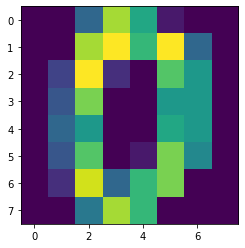

In [9]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [10]:
import numpy as np
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [15]:
digits_img = np.reshape(digits_img, (digits_img.shape[0], digits_img.shape[1]*digits_img.shape[2]))

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [16]:
digits_img.shape

(1797, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [17]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [18]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [19]:
type(digits_target)

numpy.ndarray

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [20]:
from sklearn.model_selection import train_test_split


Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(digits_img, digits_target)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [22]:
x_train.shape

(1347, 64)

In [23]:
x_test.shape

(450, 64)

In [24]:
y_train.shape

(1347,)

In [25]:
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [29]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [31]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9911111111111112


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  3  0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0  0  0 40]]


### Decision Tree

#### Treinamento

In [40]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [41]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [42]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [43]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [44]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8311111111111111


Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [45]:
confusion_matrix(y_test, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 33,  2,  5,  2,  1,  0,  2,  1,  1],
       [ 0,  1, 39,  0,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  1, 34,  0,  1,  0,  0,  1,  5],
       [ 1,  4,  0,  0, 37,  0,  1,  5,  1,  0],
       [ 0,  1,  0,  2,  1, 37,  0,  0,  2,  2],
       [ 0,  2,  0,  0,  1,  0, 45,  0,  1,  0],
       [ 0,  1,  1,  0,  0,  0,  0, 39,  0,  2],
       [ 1,  1,  1,  4,  0,  1,  0,  4, 34,  2],
       [ 0,  0,  0,  1,  1,  0,  0,  2,  1, 35]], dtype=int64)

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

Acurácia se refere ao quão perto um resultado obtido para um valor, dessa forma, no contexto de dados temos que a acurácia se trata da porcentagem dos dados de teste que foram classificados de forma correta.
Uma alternativa seria verificar também a Sensbilidade, Especificidade, Precisão, Recall, Medida F, utilizando, por exemplo, uma matriz de confusão, pois é possível que nossa acurácia seja baixa ou muito alta por certa contaminação dos dados utilizados e isso nos daria uma ideia de como se dá essa contaminação.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

Em suma, uma matriz de confusão nos informa a quantidade de verdadeiros positivos e negativos e também de falsos positivos e negativos.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha representa uma classe prevista e cada coluna representa uma classe esperada, de tal forma que a diagonal principal representa os verdadeiros positivos e negativos, ou seja, somando toda a diagonal temos o número de acertos total. 

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, pois a diferença de intensidade ainda seria uma forma de quantizar as informações da matriz de confusão.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Poderíamos, primeiramente definir um número de vizinhos ímpar para sempre haver um desempate, também é necessário fazer vários testes para tentar encontrar um número de vizinhos que generalize bem os dados, ou seja, tem uma boa predição e também não está sofrendo overfitting. Isso influencia na capacidade de generalização do nosso algoritmo e até mesmo no seu tempo de execução. 

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Sim, o método de Decision Tree, pois ele trabalha apenas com base nos dados e suas correlações, sem tomar um parâmetro específico como o número de vizinhos "k" do KNN.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

No caso, apenas levando em conta a acurácia, tivemos que o classificador KNN se saiu melhor neste laboratório com uma taxa de acerto 0,99, enquanto que a Árvore de Decisão obteve 0,83. Em caso de utilizarmos outra base de dados poderia acontecer da Árvore de Decisão obter uma acurácia maior, diferentes bases geralmente possuem diferentes distribuições de dados e para cada distribuição há um modelo específico que melhor generaliza a base.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)